In [2]:
import numpy as np
import xarray as xr
import os.path as op
from dask.diagnostics import ProgressBar
from xmitgcm import open_mdsdataset
import xgcm.grid as xgd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [4]:
ys, dy = (165,5)
ts = int(360*86400*ys/6e2+144)
te = int(360*86400*(ys+dy)/6e2+144)
print(ts,te)

8553744 8812944


In [5]:
ds = open_mdsdataset(op.join(ddir,'FeT_diags_bgc/'),
                     iters=range(ts,te,144),
                     prefix=['FeTtave','FeTBGCtave'], 
                     delta_t=6e2
                    )
ds

OSError: Could not find the expected file prefixes ['FeTtave', 'FeTBGCtave'] at iternum 8.55374e+06. (Instead found [])

In [19]:
tempo = (ds.TRAC03 * ds.hFacC*ds.rA*ds.drF).mean(['XC','YC']).sum('Z')
fe_cont = xr.DataArray(np.zeros((5,360)), dims=['iYEAR','iDAY'],
                      coords={'iYEAR':range(5),'iDAY':range(360)})
fe_cont.attrs['unit'] = 'mmol Fe'
for i in range(5):
    fe_cont[i] = tempo[i*360:i*360+360].data

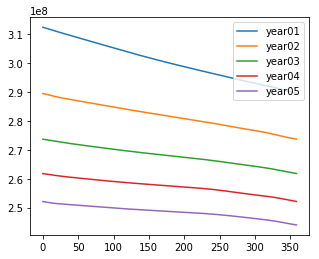

In [22]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(5):
    ax.plot(range(360),fe_cont[i], label=r"year%02d" % (i+1))
ax.legend(loc='upper right')

In [30]:
grid = xgd.Grid(ds, periodic=['X'])
grid

<xgcm.Grid>
Z Axis (not periodic):
  * center   Z (40) --> left
  * left     Zl (40) --> center
  * outer    Zp1 (41) --> center
  * right    Zu (40) --> center
X Axis (periodic):
  * center   XC (100) --> left
  * left     XG (100) --> center
T Axis (not periodic):
  * center   time (1800)
Y Axis (not periodic):
  * center   YC (200) --> left
  * left     YG (200) --> center

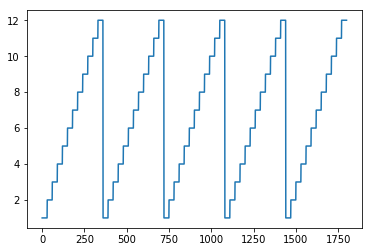

In [7]:
month = np.tile(np.repeat(range(1,13),30),5)
plt.plot(month)

In [9]:
ds['month'] = ('time', month)
ds_clim = ds.groupby('month').mean(['time','XC','XG'])
ds_clim

<xarray.Dataset>
Dimensions:   (YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, month: 12)
Coordinates:
  * YC        (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * YG        (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    drC       (Zp1) float64 5.0 10.0 10.0 11.0 13.0 15.0 17.5 20.5 24.0 28.0 ...
    drF       (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC    (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
    PHrefF    (Zp1) >f4 0.0 98.1 196.2 294.3 412.02 549.36 706.32 892.71 ...
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    UVEL      (month, Z, YC) float32 d

In [10]:
ds_anom = ds.groupby('month') - ds_clim
ds_anom

<xarray.Dataset>
Dimensions:   (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * YC        (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * XG        (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG        (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 100000000.0 100000000.0 100000000.0 100000000.0 ...
    dxG       (YG, XC) >f4 10000.0 10000.0 10000.0 10000.0 10000.0 10000.0 ...
    dyG       (YC, XG) >f4 10000.0 10000.0 10000.0 10000.0 10000.0 10000.0 ...
    Depth     

In [11]:
with ProgressBar():
    ds_clim.load()

[########################################] | 100% Completed |  7min 25.4s


In [12]:
with ProgressBar():
    ds_anom.load()

[########################################] | 100% Completed | 35min 30.1s


In [27]:
febar = ds_clim.TRAC03
vfe_bar = ds_clim.VTRAC03
wfe_bar = ds_clim.WTRAC03
vbar = ds_clim.VVEL
wbar = ds_clim.WVEL
diffbar = ds_clim.DFrITr03
dFeTbgcbar = ds_clim.FeTbgc

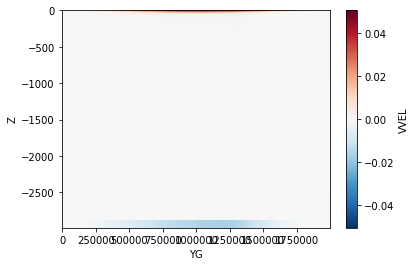

In [17]:
vbar.mean('month').plot()

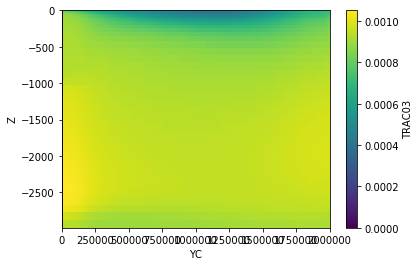

In [16]:
febar.mean('month').plot()

In a flat-bottom zonal re-entrant channel flow, the monthly climatological average becomes statistically equivalent to zonal averaging as there is no inhomogenuity in the zonal direction, i.e.

$$\overline{c(t,x,z,y)}^m = \overline{c}^m(z,y) \approx \overline{c}^x(z,y) = \overline{c(t,z,y,x)}^x.$$

Defining $\overline{(\ )} = \overline{(\ )}^{mx}$ and $(\ )' = (\ ) - \overline{(\ )}$, taking the temporal and zonal averaging gives

$$\overline{\frac{\partial c}{\partial t} + \frac{\partial}{\partial y} (v\ c) + \frac{\partial}{\partial z}(w\ c) = K \nabla^2 c + \dot{c}}$$

$$\therefore\ \overline{\frac{\partial \overline{c}^x}{\partial t}}^m + \frac{\partial}{\partial y} (\overline{v}\ \overline{c}) + \frac{\partial}{\partial z}(\overline{w}\ \overline{c}) = -\frac{\partial}{\partial y}(\overline{v'c'}) - \frac{\partial}{\partial z}(\overline{w'c'}) + K \nabla_x^2 \overline{c} + \overline{\dot{c}} \ \ \ (1)$$

where the diffusive term can be re-written as 
$$K \nabla^2 c = -\nabla\cdot (-K\nabla c) = -\nabla \cdot F_{diff}.$$ 
The minus sign in front of $K$ comes from the fact that diffusion is downgradient (high-to-low) and the outer minus sign represents the convergence, i.e. increase in tracer concentration. $\tt{MITgcm}$ outputs the average of $F_{diff}$. It is possible to write this using the transformed-Eulerian mean (TEM) formation but since the contours of tracers are not necessarily aligned with isentropes, it may not be as insightful. Now, taking the volume integral of eqn. (1) gives

$$\int\Big( \overline{\frac{\partial \overline{c}^x}{\partial t}}^m + \frac{\partial}{\partial y} (\overline{v}\ \overline{c}) + \frac{\partial}{\partial z}(\overline{w}\ \overline{c}) = -\frac{\partial}{\partial y}(\overline{v'c'}) - \frac{\partial}{\partial z}(\overline{w'c'}) - \frac{\partial}{\partial z} \overline{F}_v + \overline{\dot{c}}\Big)\ dV$$

and using Gauss' divergence theorem $\int \nabla \cdot (\boldsymbol{v}c)\ dV = \int (\boldsymbol{v}c)\cdot \boldsymbol{n}\ dA$, we get

$$\int \overline{\frac{\partial \overline{c}^x}{\partial t}}^m dV = \int_I \overline{v}\ \overline{c}\ dA - \int_{III} \overline{v}\ \overline{c}\ dA + \int_{II} \overline{w}\ \overline{c}\ dA - \int_{IV} \overline{w}\ \overline{c}\ dA + \int_I \overline{v'c'}\ dA - \int_{III} \overline{v'c'}\ dA + \int_{II} \overline{w'c'}\ dA - \int_{IV} \overline{w'c'}\ dA - \big[ \overline{F}_v(0) - \overline{F}_v(z)\big] + \int \overline{\dot{c}}\ dV$$

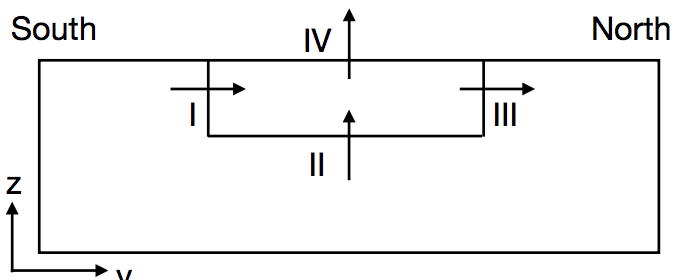

In [23]:
from IPython.display import Image
Image(op.join(ddir, 'tracer-box.png'))

In [28]:
vp = ds_anom.VVEL
wp = ds_anom.WVEL
fep = ds_anom.TRAC03

# $$\overline{\boldsymbol{v}}\ \overline{Fe}$$

In [31]:
fe_intrp = grid.interp(febar, 'Y', **{'boundary':'fill'})
vbarfebar = (vbar * fe_intrp).compute()
w_intrp = grid.interp(wbar, 'Z', **{'boundary':'fill'})
wbarfebar = (w_intrp * febar).compute()

wbarfebar

<xarray.DataArray (month: 12, Z: 40, YC: 200)>
array([[[ 0.000000e+00,  2.582881e-11, ..., -2.509223e-10,  2.430136e-10],
        [ 0.000000e+00,  4.425954e-11, ..., -5.215475e-10,  5.358591e-10],
        ...,
        [ 0.000000e+00, -1.059452e-09, ..., -2.683802e-09, -3.915309e-10],
        [ 0.000000e+00, -5.427421e-10, ..., -8.570335e-10, -4.693454e-10]],

       [[ 0.000000e+00,  5.089329e-11, ..., -2.747732e-10,  2.333375e-10],
        [ 0.000000e+00,  1.997655e-10, ..., -5.276085e-10,  4.856742e-10],
        ...,
        [ 0.000000e+00, -8.183719e-10, ..., -2.354625e-09, -1.014831e-09],
        [ 0.000000e+00, -4.157212e-10, ..., -2.682451e-10, -1.127499e-09]],

       ...,

       [[ 0.000000e+00, -7.551712e-11, ..., -7.535546e-10,  1.343162e-09],
        [ 0.000000e+00, -2.360634e-10, ..., -1.805055e-09,  3.004085e-09],
        ...,
        [ 0.000000e+00, -1.162316e-09, ..., -5.343664e-09,  2.058386e-09],
        [ 0.000000e+00, -5.939745e-10, ..., -2.119571e-09,  6.050175e-10

In [32]:
nys,nyn = (50,150)
vbarfebar_I = grid.cumsum(vbarfebar  * ds.hFacS.mean(['XC'])*ds.drF,
                          'Z', to='outer', boundary='fill')[:,:,nys].compute()
vbarfebar_III = grid.cumsum(vbarfebar * ds.hFacS.mean(['XC'])*ds.drF,
                            'Z', to='outer', boundary='fill')[:,:,nyn].compute()
vbarfebar_III

<xarray.DataArray 'concatenate-c941286d3015d1f23e87e912e9611bea' (month: 12, Zp1: 41)>
array([[ 0.      ,  0.000207,  0.000345, ...,  0.000432,  0.000446, -0.000323],
       [ 0.      ,  0.000224,  0.000376, ...,  0.00042 ,  0.000398, -0.000376],
       [ 0.      ,  0.000218,  0.000372, ...,  0.000472,  0.000477, -0.000367],
       ...,
       [ 0.      ,  0.000162,  0.000288, ...,  0.000571,  0.000566, -0.000384],
       [ 0.      ,  0.000171,  0.0003  , ...,  0.000564,  0.000564, -0.000365],
       [ 0.      ,  0.000178,  0.000301, ...,  0.000525,  0.000531, -0.000321]],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    YG       >f4 1500000.0

In [33]:
wbarfebar_II = grid.interp(wbarfebar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC']),
                          'Z', to='outer', boundary='fill')[:,:,nys:nyn].sum(['YC']).compute()
wbarfebar_IV = grid.interp(wbarfebar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC']),
                          'Z', to='outer', boundary='fill')[:,0,nys:nyn].sum(['YC']).compute()
wbarfebar_IV

<xarray.DataArray 'mul-a5f39a9860b7ac07addae449f5d06abd' (month: 12)>
array([0.069785, 0.049916, 0.044359, 0.080077, 0.092367, 0.130605, 0.150021,
       0.17768 , 0.210144, 0.153763, 0.143799, 0.140582], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    Zp1      >f4 0.0

# $$\overline{\boldsymbol{v}' Fe'}$$

In [34]:
vpfep_bar = vfe_bar - vbarfebar
vpfep_bar_I = grid.cumsum(vpfep_bar * ds.hFacS.mean(['XC'])*ds.drF, 
                          'Z', to='outer', boundary='extend')[:,:,nys].compute()
vpfep_bar_III = grid.cumsum(vpfep_bar * ds.hFacS.mean(['XC'])*ds.drF, 
                            'Z', to='outer', boundary='extend')[:,:,nyn].compute()
vpfep_bar_I.attrs['unit'] = 'mmol Fe m-1 s-1'
vpfep_bar_III.attrs['unit'] = 'mmol Fe m-1 s-1'

vpfep_bar_III

<xarray.DataArray 'concatenate-5b3b8a13beb69ac2865f7186d61b071e' (month: 12, Zp1: 41)>
array([[-8.573734e-06, -8.573734e-06, -1.575024e-05, ..., -9.220855e-04,
        -9.328474e-04, -9.465738e-04],
       [-8.326515e-06, -8.326515e-06, -1.564775e-05, ..., -9.611829e-04,
        -9.676982e-04, -9.876596e-04],
       [-1.210366e-05, -1.210366e-05, -2.292716e-05, ..., -9.245535e-04,
        -9.252704e-04, -9.285806e-04],
       ...,
       [-1.069020e-07, -1.069020e-07, -1.306216e-07, ..., -5.544573e-04,
        -5.560949e-04, -5.630631e-04],
       [-6.257142e-06, -6.257142e-06, -1.188600e-05, ..., -7.067327e-04,
        -7.161241e-04, -7.270181e-04],
       [-1.358560e-05, -1.358560e-05, -2.539054e-05, ..., -7.434924e-04,
        -7.492408e-04, -7.589453e-04]], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    YG       >f4 1500000.0
Attributes:
    unit:     mmol Fe m-1 s

In [35]:
wpfep_bar = wfe_bar - wbarfebar
wpfep_bar_II = grid.interp(wpfep_bar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC']),
                          'Z', to='outer', boundary='fill')[:,:,nys:nyn].sum(['YC']).compute()
wpfep_bar_IV = grid.interp(wpfep_bar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC']),
                          'Z', to='outer', boundary='fill')[:,0,nys:nyn].sum(['YC']).compute()
wpfep_bar_II.attrs['unit'] = 'mmol Fe s-1'
wpfep_bar_IV.attrs['unit'] = 'mmol Fe m s-1'

wpfep_bar_II

<xarray.DataArray 'mul-02ba86a4447f5aa85f17cd65d82a6e67' (month: 12, Zp1: 41)>
array([[-0.053717,  0.247262,  0.930946, ..., -1.035934, -0.562874, -0.05074 ],
       [-0.040048,  0.317818,  1.067678, ..., -0.819911, -0.041321,  0.344425],
       [-0.031134,  0.307119,  1.022764, ..., -1.104261,  0.031834,  0.568934],
       ...,
       [-0.150811, -0.591959, -1.109701, ..., -0.65833 ,  0.295393,  0.6062  ],
       [-0.1226  , -0.335418, -0.46967 , ..., -0.771889,  0.214457,  0.579105],
       [-0.109238,  0.094179,  0.721387, ..., -0.642494,  0.005921,  0.312805]],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Attributes:
    unit:     mmol Fe s-1

# $$\int \overline{\frac{\partial}{\partial t} \overline{Fe}^x}^m dV = \frac{1}{\Delta t_m}\int \big[\overline{Fe}^x(t_{m_1}) - \overline{Fe}^x(t_{m_0})\big] dV$$

where $m_0$ and $m_1$ are the timesteps of the beginning and end of each month.

In [36]:
dsS = open_mdsdataset(op.join(ddir,'FeT_diags_bgc/'), grid_dir=ddir,
                      iters=range(259200,522720,4320),
                      prefix=['FeTSnap_30d'], 
                      delta_t=6e2
                     )
dsS

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 61)
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * XG       (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG       (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG      (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyG      (YC, XG) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (Y

In [37]:
fe_xbar = dsS.TRAC03.mean('XC')
tempo = (-fe_xbar[:-1]+fe_xbar[1:].data) / (3e1*864e2)
tempo.coords['month'] = ('time',np.tile(range(1,13),5))

# febar_vol = grid.cumsum(febar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC'])*ds.drF,
#                         'Z', to='outer', boundary='fill'
#                        )[:,:,nys:nyn].sum(['YC'])
# dfebardt = (-febar_vol + febar_vol.roll(month=-1).data).compute() / (3e1*24.*36e2)
grid = xgd.Grid(dsS, periodic=['X'])
dfedt_bar = grid.cumsum(tempo.groupby('month').mean(['time'])
                       * dsS.hFacC.mean('XC')*dsS.rA.mean('XC')*dsS.drF,
                       'Z', to='outer', boundary='fill'
                      )[:,:,nys:nyn].sum(['YC']).compute()
dfedt_bar.attrs['unit'] = 'mmol Fe s^-1'

dfedt_bar

<xarray.DataArray 'concatenate-9a760292ab20bfe55d530bc8827757d4' (month: 12, Zp1: 41)>
array([[  0.      ,  -1.526987,  -3.05965 , ..., -34.98258 , -36.128357,
        -37.34431 ],
       [  0.      ,  -1.061847,  -2.121931, ..., -32.16539 , -33.179073,
        -34.278553],
       [  0.      ,   0.066781,   0.133043, ..., -35.072952, -36.0431  ,
        -36.966465],
       ...,
       [  0.      ,  -0.762821,  -1.527938, ..., -43.950436, -45.203793,
        -46.279865],
       [  0.      ,  -2.497952,  -4.986573, ..., -49.038486, -50.052914,
        -50.920124],
       [  0.      ,  -3.949506,  -7.901441, ..., -61.749767, -62.83938 ,
        -63.775997]], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Attributes:
    unit:     mmol Fe s^-1

# $$\int_V \frac{\partial}{\partial z} F_{diff}\ dV = \int_A \big[F_{diff}(0) - F_{diff}(z)\big]\ dA$$

In [38]:
diffe_II = xr.DataArray(np.zeros_like(diffbar),
                        dims=wfe_bar.dims, coords=wfe_bar.coords)
diffe_II[:] = np.nan
for i in range(len(wfe_bar.Z)):
    diffe_II[:,i] = diffbar[:,0].data - diffbar[:,i].data
diffe_II = grid.interp(diffe_II, 'Z', **{'to':'outer','boundary':'fill'}
                      )[:,:,nys:nyn].sum(['YC'])
diffe_II.attrs['unit'] = 'mmol Fe s^-1'

diffe_II

<xarray.DataArray (month: 12, Zp1: 41)>
array([[ 0.000000e+00, -2.683843e+00, -8.257487e+00, ...,  5.491565e-06,
         7.894604e-02,  7.894054e-02],
       [ 0.000000e+00, -2.307593e+00, -6.947969e+00, ...,  1.501406e-05,
         6.637809e-02,  6.636309e-02],
       [ 0.000000e+00, -2.714572e+00, -7.879632e+00, ...,  7.503914e-09,
         7.048780e-02,  7.048780e-02],
       ...,
       [ 0.000000e+00, -2.982059e+00, -1.039480e+01, ...,  2.155382e-07,
         5.955305e-02,  5.955283e-02],
       [ 0.000000e+00, -3.316470e+00, -1.111165e+01, ...,  1.804152e-07,
         5.688234e-02,  5.688215e-02],
       [ 0.000000e+00, -5.467639e+00, -1.687116e+01, ...,  9.847496e-06,
         6.971095e-02,  6.970111e-02]], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Attributes:
    unit:     mmol Fe s^-1

# $$\overline{\dot{Fe}}$$

In [42]:
dt_ptr = 6e2
tempo = ds.FeTbgc/dt_ptr
tempo.coords['month'] = ('time',month)
dotbar = grid.cumsum(tempo.groupby('month').mean(['time','XC']) 
                     * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC'])*ds.drF,
                     'Z', to='outer', boundary='fill'
                    )[:,:,nys:nyn].sum(['YC']).compute()

# dotbar = (-febgc_vol + febgc_vol.roll(month=-1).data).compute() / (3e1*24.*36e2)
dotbar

<xarray.DataArray 'concatenate-8911b94c01316e765501346486fe47ae' (month: 12, Zp1: 41)>
array([[  0.      ,  -7.428854, -15.221354, ..., -48.798847, -50.239925,
        -53.272655],
       [  0.      ,  -6.000229, -12.037362, ..., -46.016888, -47.26386 ,
        -50.117695],
       [  0.      ,  -5.559225, -10.626966, ..., -46.22633 , -47.368954,
        -50.054035],
       ...,
       [  0.      ,  -6.947307, -16.735868, ..., -55.88304 , -57.330208,
        -59.661945],
       [  0.      ,  -9.60366 , -21.458693, ..., -61.540485, -62.89949 ,
        -65.13435 ],
       [  0.      , -15.716108, -32.248672, ..., -71.32509 , -72.57617 ,
        -74.71645 ]], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...

In [46]:
nx = 1e2
Lx = nx*1e4
res = dfedt_bar*nx - ((vbarfebar_I-vbarfebar_III)*Lx + (wbarfebar_II-wbarfebar_IV.values[:,np.newaxis])*nx
                     + (vpfep_bar_I-vpfep_bar_III)*Lx
                     + (wpfep_bar_II-wpfep_bar_IV.values[:,np.newaxis])*nx
                     - diffe_II*nx
                     + dotbar*nx)

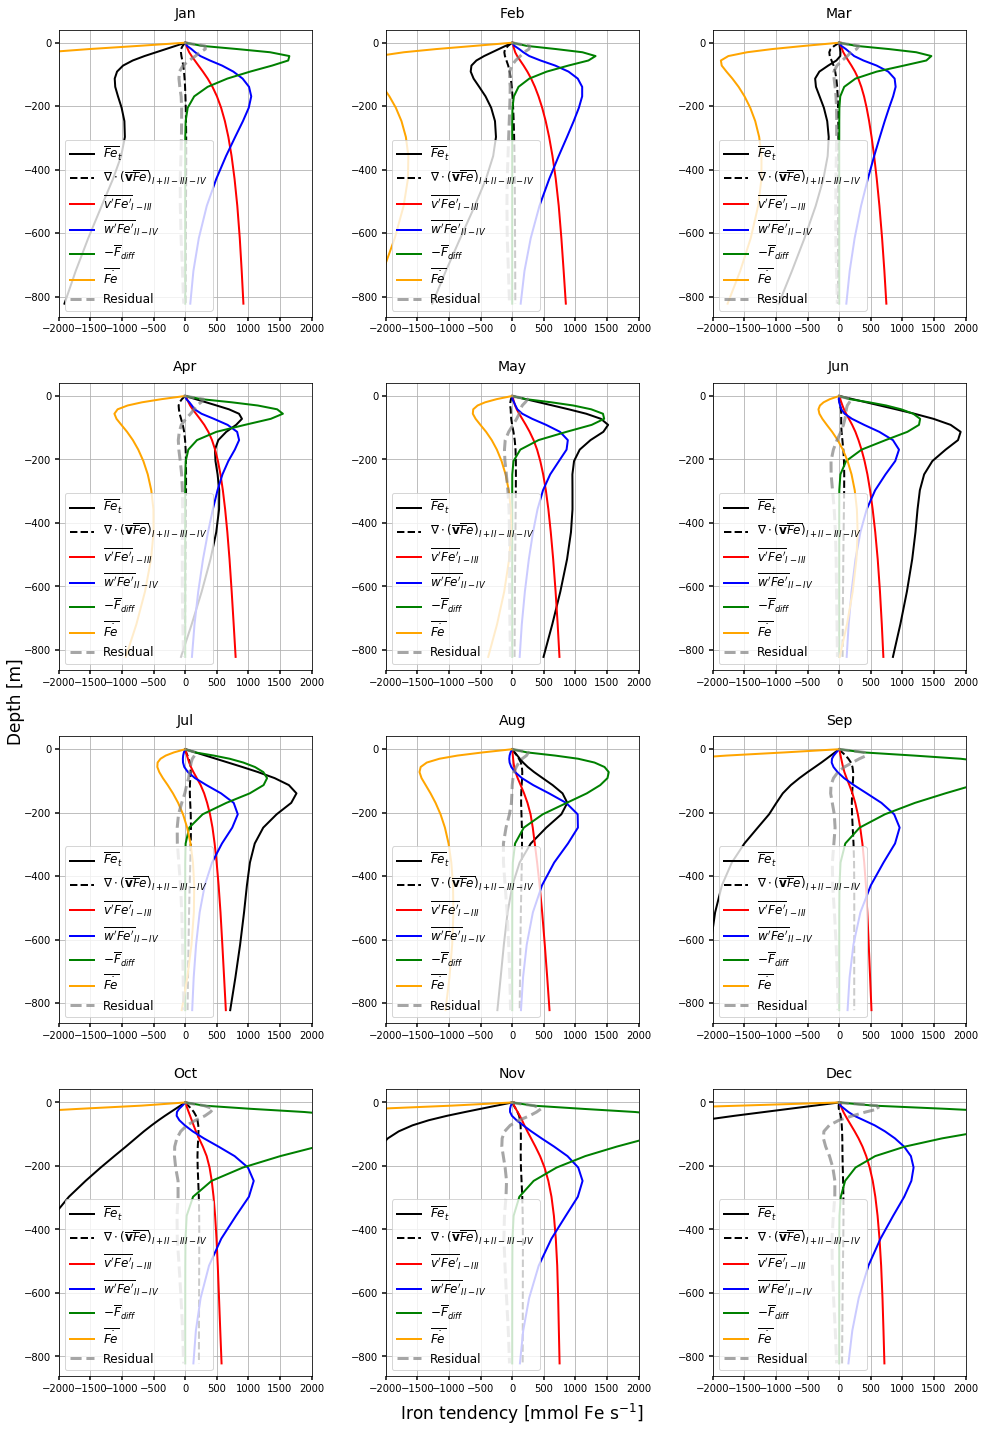

In [50]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
nz = 20

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,20))
for j in range(4):
    for i in range(3):
        axes[j,i].plot(dfedt_bar[j*3+i,:nz]*nx, dfedt_bar.Zp1[:nz], 'k',
                       lw=2, label=r'$\overline{Fe}_t$')
        axes[j,i].plot(((vbarfebar_I-vbarfebar_III)*Lx 
                        + (wbarfebar_II-wbarfebar_IV.values[:,np.newaxis])*nx
                       )[j*3+i,:nz], 
                       vbarfebar_I.Zp1[:nz], 'k--',
                       lw=2, label=r'$\nabla\cdot (\overline{\mathbf{v}}\overline{Fe})_{I+II-III-IV}$')
#         axes[j,i].plot(-wbarfebar_II[j*3+i,:nz]*Lx, wbarfebar_II.Z[:nz], 'b',
#                        lw=2, label=r'$-\overline{w}\overline{Fe}$')
        axes[j,i].plot((vpfep_bar_I-vpfep_bar_III)[j*3+i,:nz]*Lx, vpfep_bar_I.Zp1[:nz], 'r',
                       lw=2, label=r"$\overline{v' Fe'}_{I-III}$")
        axes[j,i].plot((wpfep_bar_II-wpfep_bar_IV.values[:,np.newaxis])[j*3+i,:nz]*nx, wpfep_bar_II.Zp1[:nz], 'b',
                       lw=2, label=r"$\overline{w' Fe'}_{II-IV}$")
        axes[j,i].plot(-diffe_II[j*3+i,:nz]*nx, diffe_II.Zp1[:nz], 'g',
                       lw=2, label=r"$-\overline{F}_{diff}$")
        axes[j,i].plot(dotbar[j*3+i,:nz]*nx, dotbar.Zp1[:nz], 'orange',
                       lw=2, label=r"$\overline{\dot{Fe}}$")
        axes[j,i].plot(res[j*3+i,:nz], res.Zp1[:nz], '--', color='grey',
                       lw=3, alpha=0.7, label=r"Residual")
#         ax2 = axes[j,i].twiny()
#         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
#                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
#                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
#                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
#                       )
# #         ax2.set_xlim([.1,1e1])
#         ax2.set_xscale('log')
#         ax2.xaxis.label.set_color(p2.get_color())

        tkw = dict(size=4, width=1.5)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
        axes[j,i].tick_params(axis='both', **tkw)
        
        axes[j,i].set_title(months[j*3+i],fontsize=14,y=1.02)
        axes[j,i].legend(loc='lower left', fontsize=12)
        axes[j,i].set_xlim([-2e3,2e3])
        axes[j,i].grid(True)

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.01, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=17)
fig.text(0.4, 0.005, 'Iron tendency [mmol Fe s$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=17)

plt.tight_layout(pad=2.7)
# plt.grid(True)
plt.savefig(op.join(ddir,'IronFlux_FeTdiags_monthlyclim.pdf'))